In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")

In [52]:
df = pd.read_csv("./twtr_roberta_sentiment.csv", low_memory=False)

In [50]:
df

date_created                                   user_description  \
0      7/30/21 23:53  Sociafy is an influencer-based content discove...   
1      7/30/21 23:51  Home of Crypto Communities. $ATMOS \n\nhttps:/...   
2      7/30/21 23:50  Developer, Artist, Investor, Entrepreneur, Eff...   
3      7/30/21 23:49  Comprehensive, up-to-date news coverage, aggre...   
4      7/30/21 23:49  Gay Progressive Patriot. #NYC's the greatest c...   
...              ...                                                ...   
72797  8/15/22 22:06  Gay Progressive Patriot. #NYC's the greatest c...   
72798  8/15/22 22:01  Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...   
72799  8/15/22 22:01  Board Certified | CEO @NeighborhoodPsy Writer ...   
72800  8/15/22 21:59  Israel Cruz is running for U.S. Senate in the ...   
72801  8/15/22 21:57  Profile run by Lucky (the monster) (ze/hir/hir...   

         user_created  user_followers  user_friends  user_favourites  \
0        9/30/11 5:59           36219           181              930   
1        2/9/17 23:15            2426          1104             8173   
2         7/9/09 4:07             495          2681             6930   
3        7/24/17 7:39             340           114                1   
4       6/20/08 18:32            6451          2806             4257   
...               ...             ...           ...              ...   
72797   6/20/08 18:32            6343          2786             4226   
72798   4/27/09 20:24            4668          5122           112650   
72799    3/21/08 4:29            3397          2163             3541   
72800  10/13/21 18:18            1159          1469             1459   
72801    6/4/21 23:31              69           739              665   

       user_verified           date  \
0              False  7/30/21 23:53   
1              False  7/30/21 23:51   
2              False  7/30/21 23:50   
3              False  7/30/21 23:49   
4              False  7/30/21 23:49   
...              ...            ...   
72797          False  8/15/22 22:06   
72798          False  8/15/22 22:01   
72799          False  8/15/22 22:01   
72800          False  8/15/22 21:59   
72801          False  8/15/22 21:57   

                                                    text  \
0      O‚Äö√Ñ√¥Reilly predicts THIS is What DOOMS Bid...   
1      Corruption in Politics\n#blog #politics \nhttp...   
2      90% of US drone strikes kill civilians. An ope...   
3      100,000-Year-Old Fossil of Largest-Ever Vampir...   
4      Via @RawStory: 'People will die': Congress bla...   
...                                                  ...   
72797  Via @RawStory: Trump doesn't think Merrick Gar...   
72798  It's Okay To Be Woke: Congrats to Alabama, whe...   
72799  What constitutes "Everyday Evil"?\n\nPsycholog...   
72800  @DrOz I know you won't as that would mean you ...   
72801  if you have a #demonicmachines pedal, you shou...   

                                                hashtags  is_retweet  \
0                                 ['politics', 'videos']       False   
1                                   ['blog', 'politics']       False   
2                         ['politics', 'justice', 'war']       False   
3      ['news', 'covid', 'usa', 'canada', 'uk', 'inst...       False   
4                    ['politics', 'trump', 'corruption']       False   
...                                                  ...         ...   
72797                ['politics', 'trump', 'corruption']       False   
72798  ['video', 'politics', 'liberal', 'liberallogic...       False   
72799  ['psychology', 'evil', 'politics', 'psychiatry...       False   
72800         ['PA', 'Politics', 'Fetterman', 'StopIDL']       False   
72801  ['demonicmachines', 'politics', 'thismachineki...       False   

      month_year                                    parsed_hashtags  \
0         21-Jul                             ['politics', 'videos']   
1         21-Jul                             

# Drilling into Blob Sentiment Analysis Classifcation

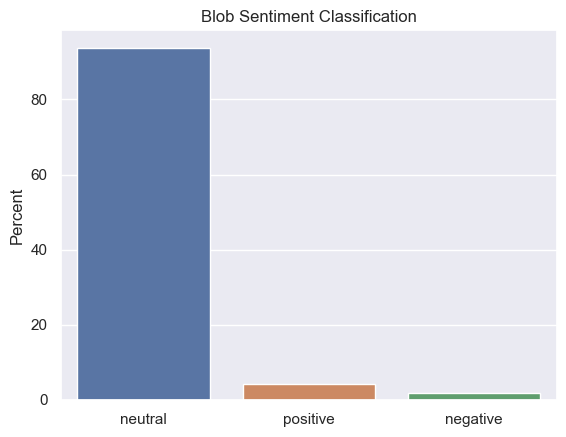

In [126]:
sns.barplot(x = (df["blob_sentiment"].value_counts(normalize=True)*100).index,
            y = (df["blob_sentiment"].value_counts(normalize=True)*100))
plt.title("Blob Sentiment Classification")
plt.ylabel("Percent")
plt.show()

# Drilling into Roberta Sentiment Analysis Classifcation

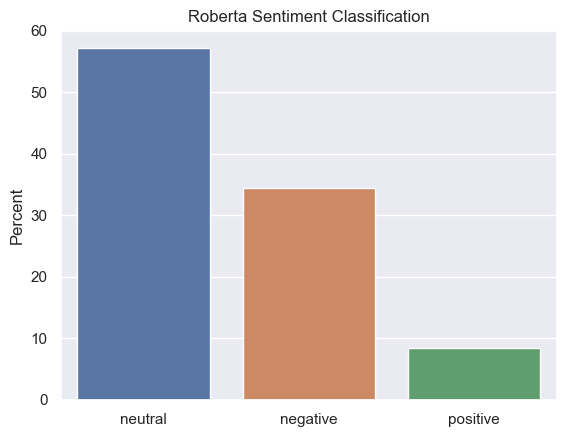

In [128]:
sns.barplot(x = (df["roberta_sentiment"].value_counts(normalize=True)*100).index,
            y = (df["roberta_sentiment"].value_counts(normalize=True)*100))
plt.title("Roberta Sentiment Classification")
plt.ylabel("Percent")
plt.show()

# Comparing Blog classification with Roberta classification

In [85]:
blob_neg = df['blob_sentiment'] == 'negative'
filtered_df = df[blob_neg]


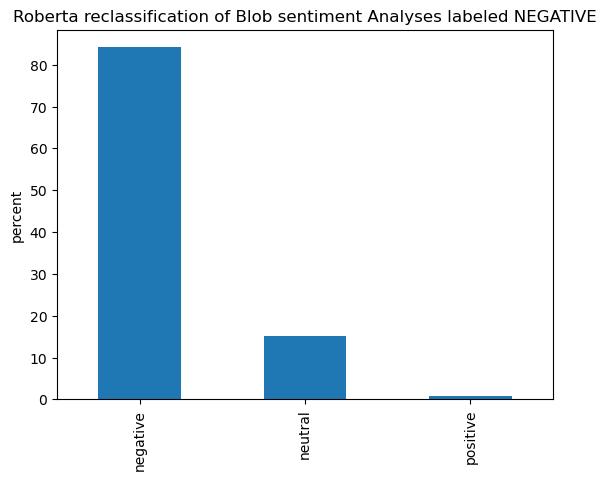

In [109]:
(filtered_df["roberta_sentiment"].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("Roberta reclassification of Blob sentiment Analyses labeled NEGATIVE")
plt.ylabel("percent")
plt.show()

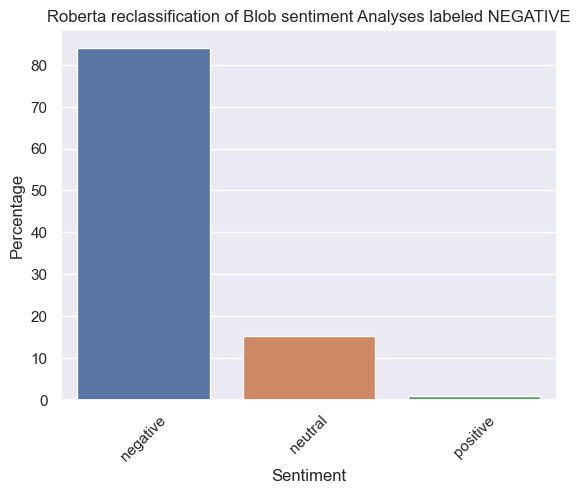

In [115]:
ax = sns.barplot(x=filtered_df["roberta_sentiment"].value_counts(normalize=True).index,
                 y=filtered_df["roberta_sentiment"].value_counts(normalize=True) * 100)

ax.set(xlabel="Sentiment", ylabel="Percentage", 
       title="Roberta reclassification of Blob sentiment Analyses labeled NEGATIVE")

plt.show()


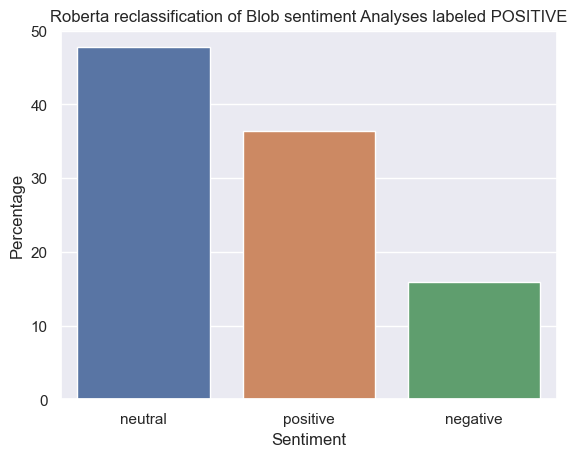

In [132]:
blob_pos = df['blob_sentiment'] == 'positive'
filtered_df = df[blob_pos]
filtered_df

ax = sns.barplot(x=filtered_df["roberta_sentiment"].value_counts(normalize=True).index,
                 y=filtered_df["roberta_sentiment"].value_counts(normalize=True) * 100)

ax.set(xlabel="Sentiment", ylabel="Percentage", 
       title="Roberta reclassification of Blob sentiment Analyses labeled POSITIVE")

plt.show()

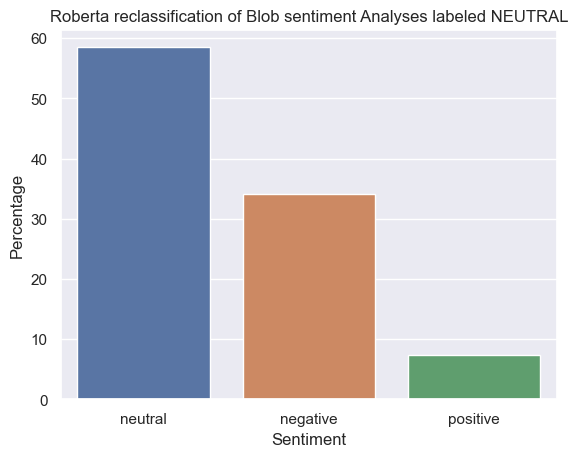

In [133]:
blob_pos = df['blob_sentiment'] == 'neutral'
filtered_df = df[blob_pos]
filtered_df

ax = sns.barplot(x=filtered_df["roberta_sentiment"].value_counts(normalize=True).index,
                 y=filtered_df["roberta_sentiment"].value_counts(normalize=True) * 100)

ax.set(xlabel="Sentiment", ylabel="Percentage", 
       title="Roberta reclassification of Blob sentiment Analyses labeled NEUTRAL")

plt.show()

In [134]:
test = pd.read_csv("./test_blob.csv")

In [141]:
test["roberta_sentiment"] = df["roberta_sentiment"]
test

Unnamed: 0   date_created  \
0               0  7/30/21 23:53   
1               1  7/30/21 23:51   
2               2  7/30/21 23:50   
3               3  7/30/21 23:49   
4               4  7/30/21 23:49   
...           ...            ...   
72797       72797  8/15/22 22:06   
72798       72798  8/15/22 22:01   
72799       72799  8/15/22 22:01   
72800       72800  8/15/22 21:59   
72801       72801  8/15/22 21:57   

                                        user_description    user_created  \
0      Sociafy is an influencer-based content discove...    9/30/11 5:59   
1      Home of Crypto Communities. $ATMOS \n\nhttps:/...    2/9/17 23:15   
2      Developer, Artist, Investor, Entrepreneur, Eff...     7/9/09 4:07   
3      Comprehensive, up-to-date news coverage, aggre...    7/24/17 7:39   
4      Gay Progressive Patriot. #NYC's the greatest c...   6/20/08 18:32   
...                                                  ...             ...   
72797  Gay Progressive Patriot. #NYC's the greatest c...   6/20/08 18:32   
72798  Runs @GeekAlabama; #Aspie proud! #ASD.  I‚Äö√Ñ...   4/27/09 20:24   
72799  Board Certified | CEO @NeighborhoodPsy Writer ...    3/21/08 4:29   
72800  Israel Cruz is running for U.S. Senate in the ...  10/13/21 18:18   
72801  Profile run by Lucky (the monster) (ze/hir/hir...    6/4/21 23:31   

       user_followers  user_friends  user_favourites  user_verified  \
0               36219           181              930          False   
1                2426          1104             8173          False   
2                 495          2681             6930          False   
3                 340           114                1          False   
4                6451          2806             4257          False   
...               ...           ...              ...            ...   
72797            6343          2786             4226          False   
72798            4668          5122           112650          False   
72799            3397          2163             3541          False   
72800            1159          1469             1459          False   
72801              69           739              665          False   

                date                                               text  \
0      7/30/21 23:53  O‚Äö√Ñ√¥Reilly predicts THIS is What DOOMS Bid...   
1      7/30/21 23:51  Corruption in Politics\n#blog #politics \nhttp...   
2      7/30/21 23:50  90% of US drone strikes kill civilians. An ope...   
3      7/30/21 23:49  100,000-Year-Old Fossil of Largest-Ever Vampir...   
4      7/30/21 23:49  Via @RawStory: 'People will die': Congress bla...   
...              ...                                                ...   
72797  8/15/22 22:06  Via @RawStory: Trump doesn't think Merrick Gar...   
72798  8/15/22 22:01  It's Okay To Be Woke: Congrats to Alabama, whe...   
72799  8/15/22 22:01  What constitutes "Everyday Evil"?\n\nPsycholog...   
72800  8/15/22 21:59  @DrOz I know you won't as that would mean you ...   
72801  8/15/22 21:57  if you have a #demonicmachines pedal, you shou...   

                                                hashtags  is_retweet  \
0                                 ['politics', 'videos']       False   
1                                   ['blog', 'politics']       False   
2                         ['politics', 'justice', 'war']       False   
3      ['news', 'covid', 'usa', 'canada', 'uk', 'inst...       False   
4                    ['politics', 'trump', 'corruption']       False   
...                                                  ...         ...   
72797                ['politics', 'trump', 'corruption']       False   
72798  ['video', 'politics', 'liberal', 'liberallogic...       False   
72799  ['psychology', 'evil', 'politics', 'psychiatry...       False   
72800         ['PA', 'Politics', 'Fetterman', 'StopIDL']       False   
72801  ['demonicmachines', 'politics', 'thismachineki...       False   

      month_year                          

# Let's recalibrate Blob and see if we can improve the sentiment analysis

use < -1 as "negetive" and > 0.5 as positive

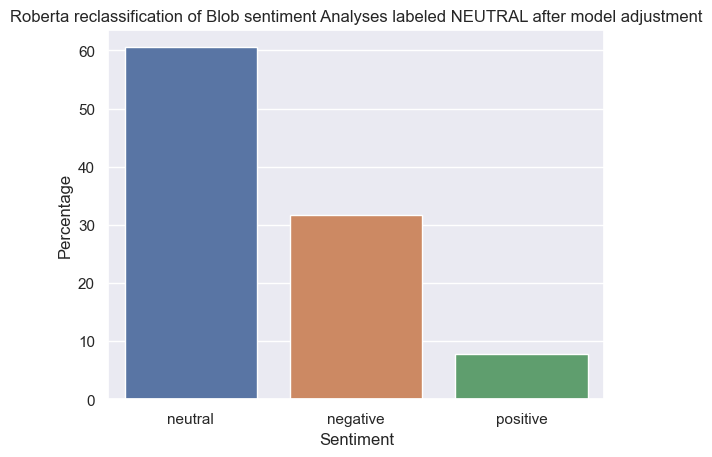

In [147]:
blob_pos = test["blob_sentiment"] == 'neutral'
filtered_df = test[blob_pos]
filtered_df

ax = sns.barplot(x=filtered_df["roberta_sentiment"].value_counts(normalize=True).index,
                 y=filtered_df["roberta_sentiment"].value_counts(normalize=True) * 100)

ax.set(xlabel="Sentiment", ylabel="Percentage", 
       title="Roberta reclassification of Blob sentiment Analyses labeled NEUTRAL after model adjustment")

plt.show()

**About 5% improvement can be observed** 

# From here and on we will only work with Roberta Model

In [152]:
df[df["locations"]== "new york"]["roberta_sentiment"].value_counts()

neutral     7236
negative    6447
positive     496
Name: roberta_sentiment, dtype: int64

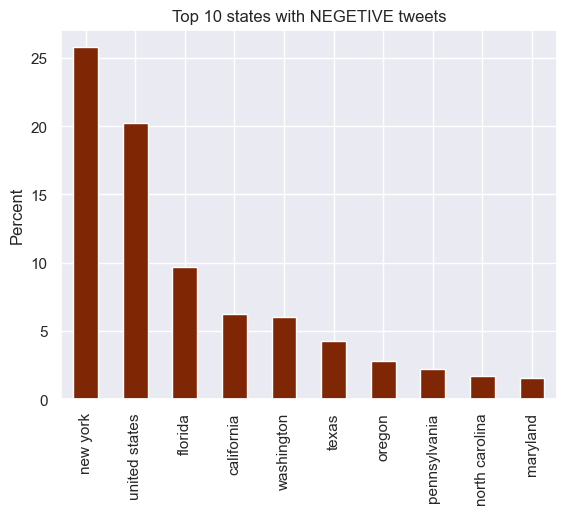

In [193]:
df[df["roberta_sentiment"]== "negative"]["locations"].value_counts(normalize="True").mul(100)[:10].plot(kind="bar", cmap="Oranges_r")
plt.title("Top 10 states with NEGETIVE tweets")
plt.ylabel("Percent")
plt.show()

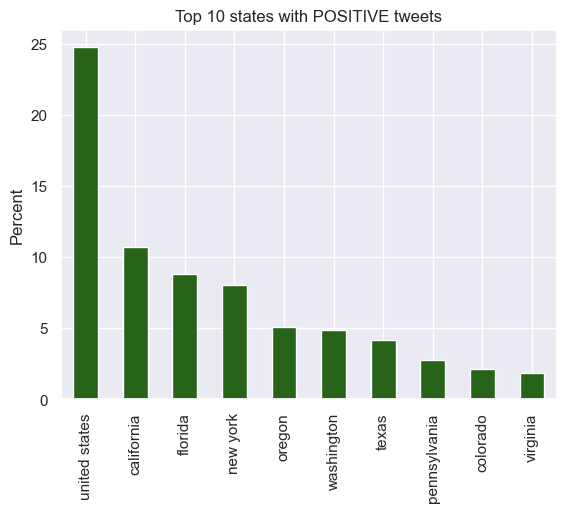

In [192]:
df[df["roberta_sentiment"]== "positive"]["locations"].value_counts(normalize="True").mul(100)[:10].plot(kind="bar", cmap="PiYG_r")
plt.title("Top 10 states with POSITIVE tweets")
plt.ylabel("Percent")
plt.show()

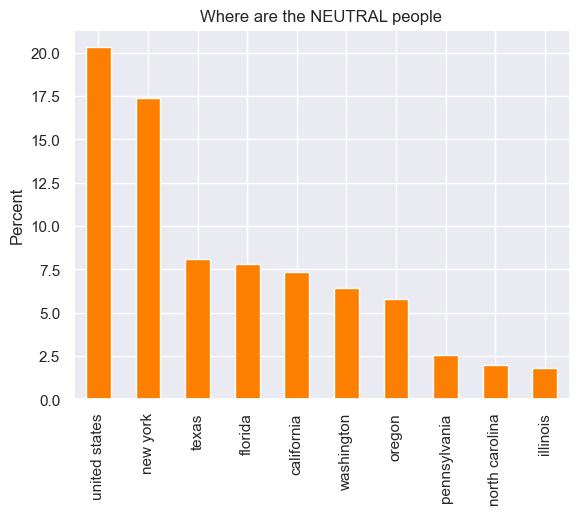

In [202]:
df[df["roberta_sentiment"]== "neutral"]["locations"].value_counts(normalize="True").mul(100)[:10].plot(kind="bar", cmap="Wistia_r")
plt.title("Where are the NEUTRAL people")
plt.ylabel("Percent")
plt.show()

<Figure size 640x480 with 0 Axes>

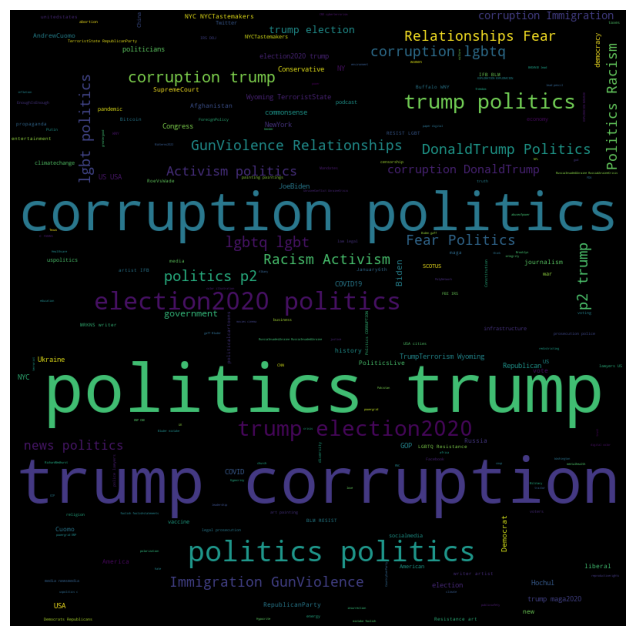

In [221]:
new_neg = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new_neg["clean_hashtags"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new_neg.loc[:, "clean_hashtags"] = new_neg.loc[:, "clean_hashtags"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new_neg["clean_hashtags"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_neg.png')


<Figure size 640x480 with 0 Axes>

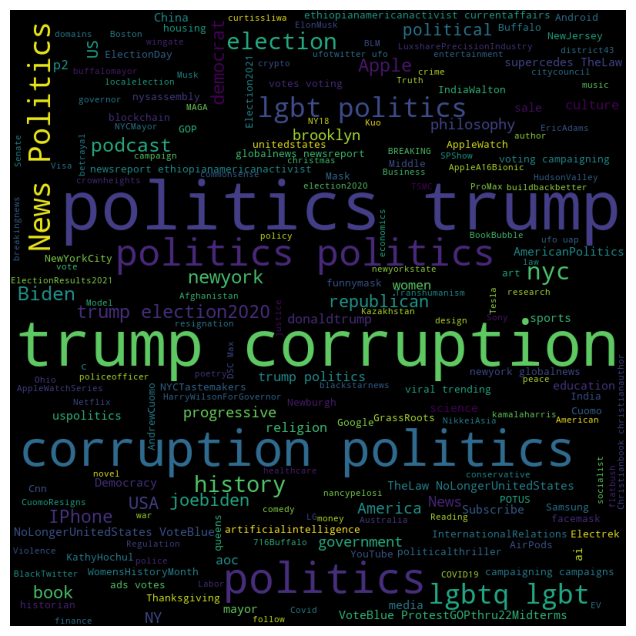

In [222]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_hashtags"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_hashtags"] = new.loc[:, "clean_hashtags"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_hashtags"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_pos.png')

<Figure size 640x480 with 0 Axes>

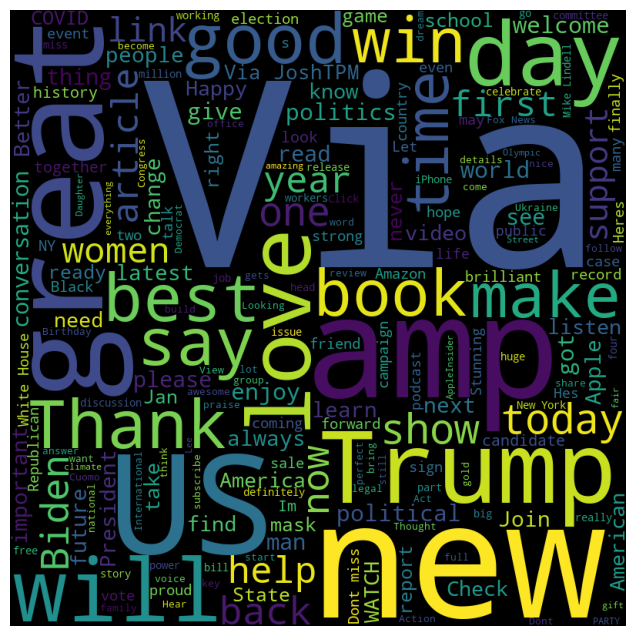

In [223]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_text"]

ax, fig
# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_pos_text.png')

<Figure size 640x480 with 0 Axes>

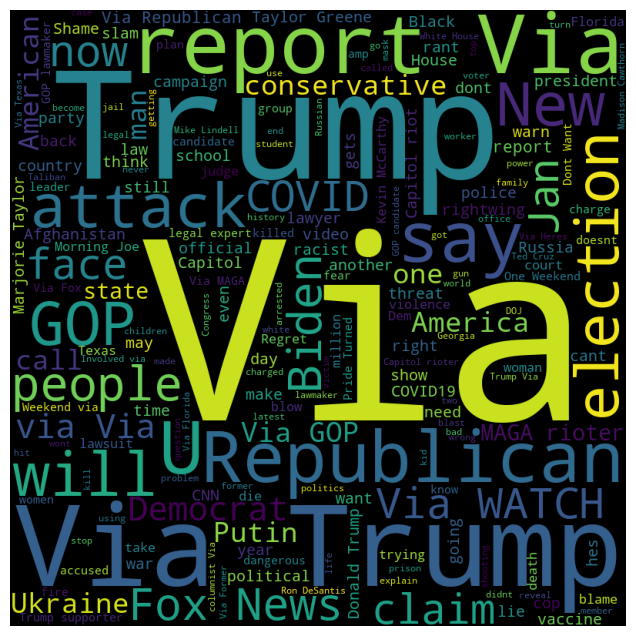

In [224]:
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()
plt.savefig('new_york_neg_text.png')

# Let's try make multiple wordcloud at the same time
## Starting with NY

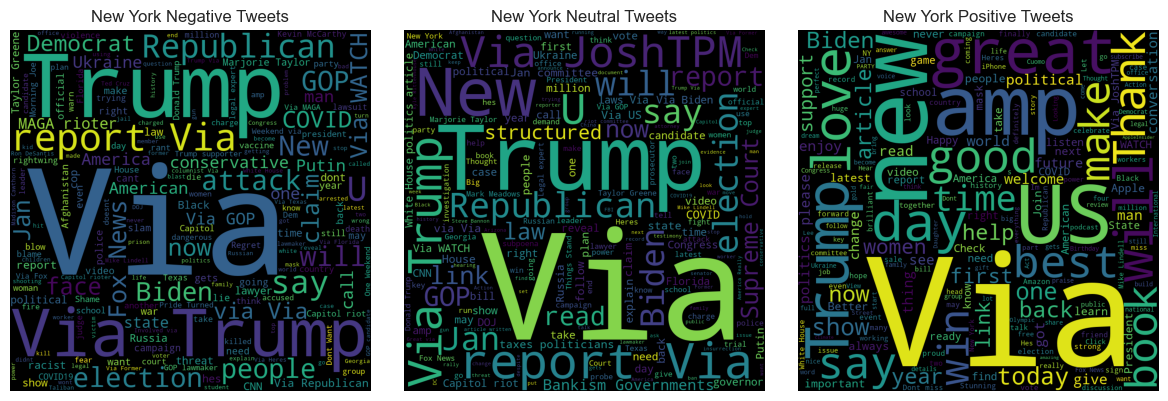

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 6, 8, 10]})

# Create three figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot data on the first two axes

new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[0].imshow(wordcloud)
axes[0].set_title('New York Negative Tweets')
axes[0].axis("off")


new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "neutral")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[1].imshow(wordcloud)
axes[1].set_title('New York Neutral Tweets')
axes[1].axis("off")


# Include the word cloud in the third figure
new = df[(df["locations"] == "new york") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[2].imshow(wordcloud)
axes[2].set_title('New York Positive Tweets')
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figures
plt.show()


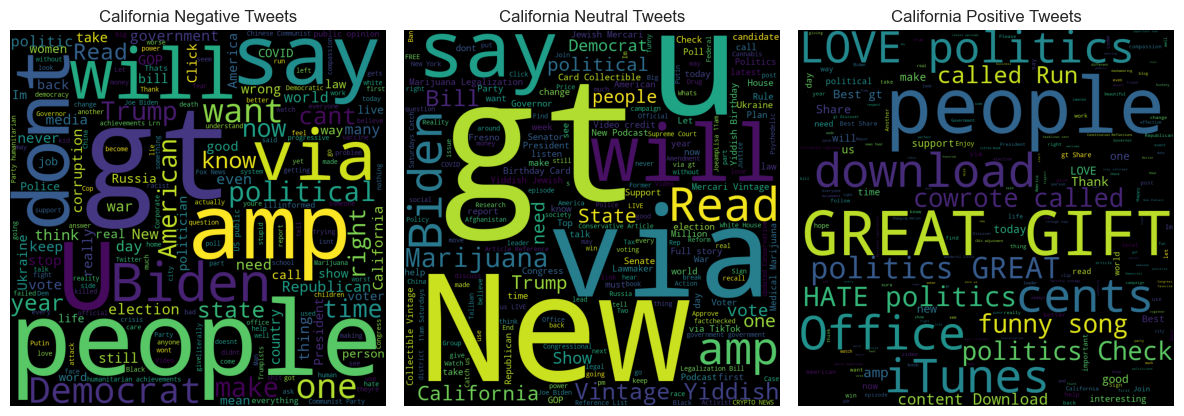

In [265]:

# Create a DataFrame
data = pd.DataFrame({'x': [1, 2, 3, 4, 5],
                     'y': [2, 4, 6, 8, 10]})

# Create three figures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

# Plot data on the first two axes

new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "negative")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[0].imshow(wordcloud)
axes[0].set_title('California Negative Tweets')
axes[0].axis("off")


new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "neutral")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[1].imshow(wordcloud)
axes[1].set_title('California Neutral Tweets')
axes[1].axis("off")


# Include the word cloud in the third figure
new = df[(df["locations"] == "california") & (df['roberta_sentiment'] == "positive")].copy()
hashtags = new["clean_text"]

# Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

# Filter out any non-string values in the 'clean_hashtags' column using .loc
hashtags_list = new["clean_text"].explode().apply(lambda x: str(x)).tolist()
hashtags_str = ' '.join(hashtags_list)

# Generate a word cloud from the hashtags string
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str)

axes[2].imshow(wordcloud)
axes[2].set_title('California Positive Tweets')
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Display the figures
plt.show()


machachusets and new jersey 


In [276]:


def create_word_cloud(state_1, state_2):
    # Create three figures
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
    state_1 = state_1
    state_2 = state_2
    sentiment_1 = "negative"
    sentiment_2 = "neutral"
    sentiment_3 = "positive"

    # Plot data on the first two axes

    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_1)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_1)].copy()

    hashtags_1 = new_1["clean_text"]
    hashtags_2 = new_2["clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_2)

    axes[0, 0].imshow(wordcloud_1)
    axes[0, 0].set_title(f'Wordcloud for {sentiment_1} sentiment in {state_1}')
    axes[0, 0].axis("off")


    axes[1, 0].imshow(wordcloud_2)
    axes[1, 0].set_title(f'Wordcloud for {sentiment_1} sentiment in {state_2}')
    axes[1, 0].axis("off")
    
    #################

    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_2)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_2)].copy()


    hashtags_1 = new_1["clean_text"]
    hashtags_2 = new_2["clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_2)

    axes[0, 1].imshow(wordcloud_1)
    axes[0, 1].set_title(f'Wordcloud for {sentiment_2} sentiment in {state_1}')
    axes[0, 1].axis("off")


    axes[1, 1].imshow(wordcloud_2)
    axes[1, 1].set_title(f'Wordcloud for {sentiment_2} sentiment in {state_2}')
    axes[1, 1].axis("off")



    #############
    # Include the word cloud in the third figure


    new_1 = df[(df["locations"] == state_1) & (df['roberta_sentiment'] == sentiment_2)].copy()
    new_2 = df[(df["locations"] == state_2) & (df['roberta_sentiment'] == sentiment_2)].copy()

    hashtags_1 = new_1["clean_text"]
    hashtags_2 = new_2["clean_text"]


    # Replace NaN values with empty strings in the 'clean_hashtags' column using .loc
    new.loc[:, "clean_text"] = new.loc[:, "clean_text"].fillna('')

    # Filter out any non-string values in the 'clean_hashtags' column using .loc
    hashtags_list_1 = hashtags_1.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_1 = ' '.join(hashtags_list_1)

    hashtags_list_2 = hashtags_2.explode().apply(lambda x: str(x)).tolist()
    hashtags_str_2 = ' '.join(hashtags_list_2)

    # Generate a word cloud from the hashtags string
    wordcloud_1 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_1)
    wordcloud_2 = WordCloud(width=800, height=800, background_color='black').generate(hashtags_str_2)

    axes[0, 2].imshow(wordcloud_1)
    axes[0, 2].set_title(f'Wordcloud for {sentiment_3} sentiment in {state_1}')
    axes[0, 2].axis("off")


    axes[1, 2].imshow(wordcloud_2)
    axes[1, 2].set_title(f'Wordcloud for {sentiment_3} sentiment in {state_2}')
    axes[1, 2].axis("off")



# Display the figures
    return plt.show()
    

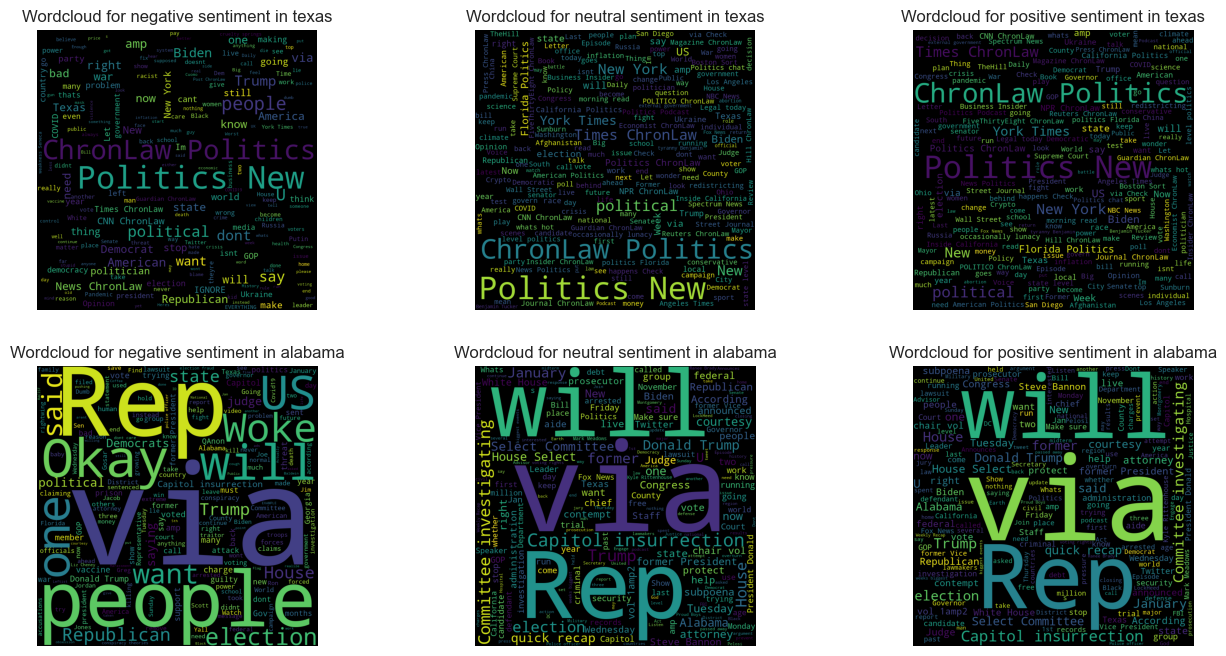

In [277]:
create_word_cloud("texas","alabama")

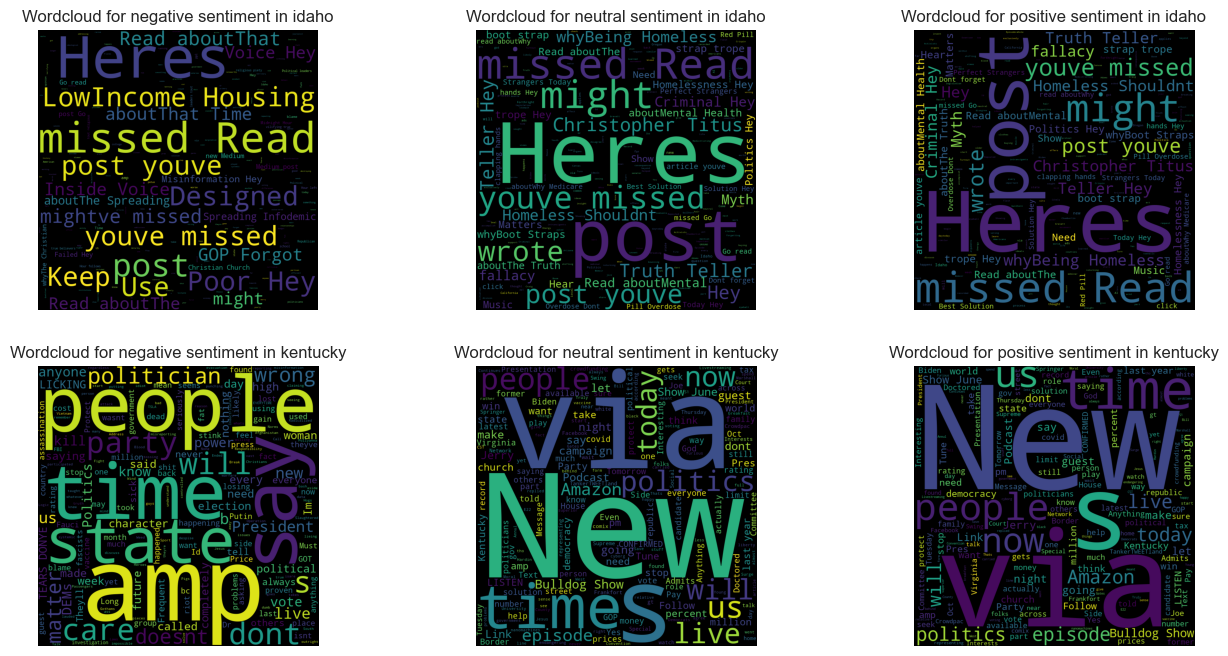

In [278]:
create_word_cloud("idaho","kentucky")

In [214]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(df['clean_hashtags'])
plt.imshow(wordcloud)